In [1]:
import yfinance as yf
import keras.backend as K
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler ,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score, mean_squared_error,mean_absolute_percentage_error,r2_score
import tensorflow as tf
from tensorflow import keras
from keras.layers import LSTM,Dropout, BatchNormalization, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from keras.models import Sequential
from keras.optimizer_v2.adam import Adam
from keras.optimizer_v2.rmsprop import RMSprop
import talib
from tensorflow.keras import layers
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline

In [2]:
data = yf.download('HSI','2018-01-01','2022-01-01')
data['Prediction']=data['Close'].shift(-1)
data.dropna(inplace=True)
data.head()

[*********************100%***********************]  1 of 1 completed


Open          High           Low         Close  \
Date                                                                 
2018-01-02  30515.300781  30515.300781  30515.300781  30515.300781   
2018-01-03  30560.900391  30560.900391  30560.900391  30560.900391   
2018-01-04  30736.500000  30736.500000  30736.500000  30736.500000   
2018-01-05  30814.599609  30814.599609  30814.599609  30814.599609   
2018-01-08  30899.500000  30899.500000  30899.500000  30899.500000   

               Adj Close  Volume    Prediction  
Date                                            
2018-01-02  30515.300781       0  30560.900391  
2018-01-03  30560.900391       0  30736.500000  
2018-01-04  30736.500000       0  30814.599609  
2018-01-05  30814.599609       0  30899.500000  
2018-01-08  30899.500000       0  31011.400391

In [3]:
linear_model  = make_pipeline(StandardScaler(),LinearRegression())

In [4]:
X=data.drop(['Volume','Prediction'],1).values
y=data['Prediction'].values
X_train=X[:-100]
X_test=X[-100:]
y_train=y[:-100]
y_test=y[-100:]

/var/folders/8h/w0jn89bj2w5g85gj4ck7w0t00000gn/T/ipykernel_21081/2929000838.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=data.drop(['Volume','Prediction'],1).values


In [5]:
linear_model.fit(
    X_train,
    y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [6]:
y_pred=linear_model.predict(X_test)

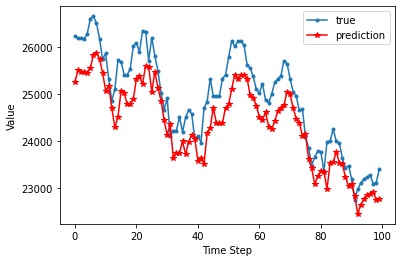

In [7]:
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r',marker='*', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()

In [8]:
mean_squared_error(y_test,y_pred,squared=False)

626.2137584217614

In [9]:
mean_absolute_percentage_error(y_test,y_pred)

0.022002194394228014

In [10]:
r2_score(y_test,y_pred)

0.6186002116452817